# IPBA Used House Price Prediction
This is the starter code in R to participate in the practice competition
## Import Libraries

In [1]:
#setting the working directory
library(dplyr) #data manipulation
library(ggplot2) #data visualization
library(car) #used to find VIF(variance inflation factor)
# to check multicollinearity
library(MASS) #
library(leaps)# for finding best regression model
library(Amelia)# missing plot 
library(psych)# heatmap


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


Attaching package: ‘psych’


The following object is masked from ‘package:car’:

    logit


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




## read the files

In [2]:
list.files(path = "../input/indore-city-house-price-predection")

[1] "IndoreHP_Sample.csv" "IndoreHP_Test.csv"   "IndoreHP_Train.csv"

In [3]:
train <- read.csv("../input/indore-city-house-price-predection/IndoreHP_Train.csv")
test <- read.csv("../input/indore-city-house-price-predection/IndoreHP_Test.csv")
sample <- read.csv("../input/indore-city-house-price-predection/IndoreHP_Sample.csv")

In [4]:
head(train)

,ID,CRIM,ZN,INDUS,RIVER_FLG,nitric.oxides.concentration,X.rooms.dwelling,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.0061304,18,2.3562,0,0.51648,6.31200,64.548,4.090000,1,296,15.3,404.8380,4.8804,24.720
2,2,0.0270369,0,6.8579,0,0.48776,6.74205,81.267,5.165784,2,242,17.8,416.7450,9.4142,22.680
3,3,0.0281087,0,6.9286,0,0.45962,7.40055,61.711,4.967100,2,242,17.8,396.7583,4.0703,36.435
4,4,0.0333411,0,2.2454,0,0.44426,7.34790,45.342,6.001578,3,222,18.7,406.4689,2.9400,34.736
5,5,0.0725025,0,2.1800,0,0.47632,7.14700,53.658,5.819712,3,222,18.7,388.9620,5.3833,38.010
6,6,0.0307455,0,2.2018,0,0.47632,6.30140,56.939,6.244066,3,222,18.7,390.1788,5.0537,27.265


In [5]:
head(test)

,ID,CRIM,ZN,INDUS,RIVER_FLG,nitric.oxides.concentration,X.rooms.dwelling,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,400,9.693915,0,18.824,0,0.63731,6.02952,100.000,1.204173,24,666,20.2,347.8425,10.0065
2,401,5.143131,0,18.462,0,0.63731,4.97000,100.000,1.305850,24,666,20.2,356.7440,3.0970
3,402,6.407985,0,17.557,1,0.63100,7.01600,93.600,1.178352,24,666,20.2,380.2885,3.0192
4,403,8.267250,0,18.462,1,0.67468,6.16875,93.184,1.107008,24,666,20.2,354.8376,9.3240
5,404,5.726680,0,17.919,1,0.66255,6.95032,96.800,1.329566,24,666,20.2,364.0701,3.5808
6,405,4.553952,0,17.919,0,0.63856,6.63100,69.628,2.431584,24,666,20.2,363.4396,12.1264


In [6]:
head(sample)

,ID,MEDV
,<int>,<int>
1,400,18
2,401,18
3,402,18
4,403,18
5,404,18
6,405,18


## Perform all the other important data analysis
### 1. Data Understanding
### 2. Data Cleaning/ Quality checks
### 3. Data Manipulations
### 4. Data Exploration and Viz
### 5. Modeling (Development and Evaluation)
### 6. Submissions

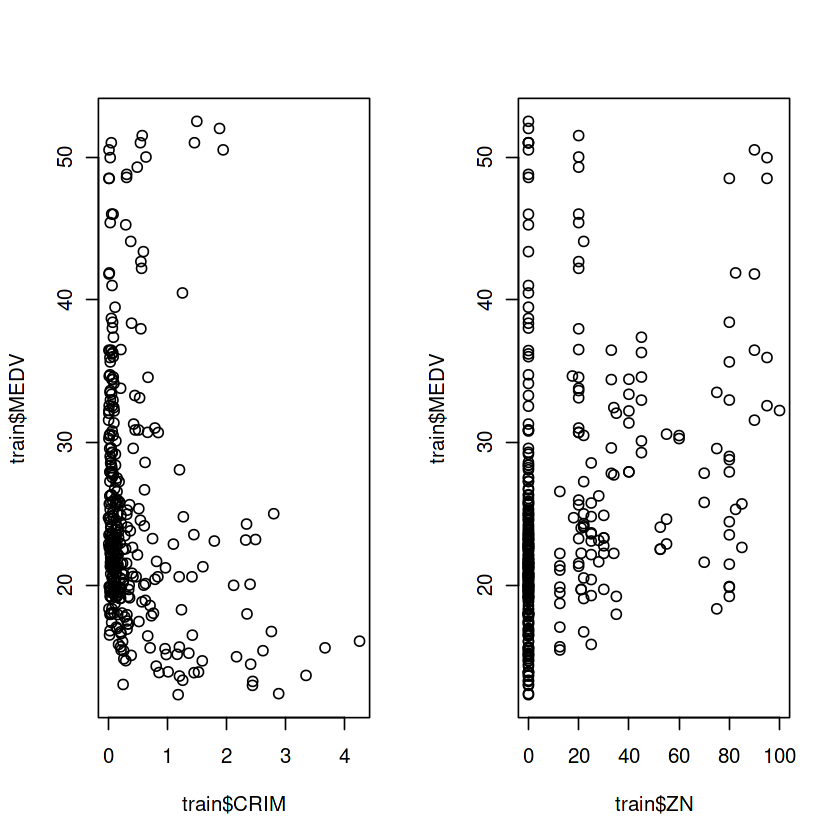

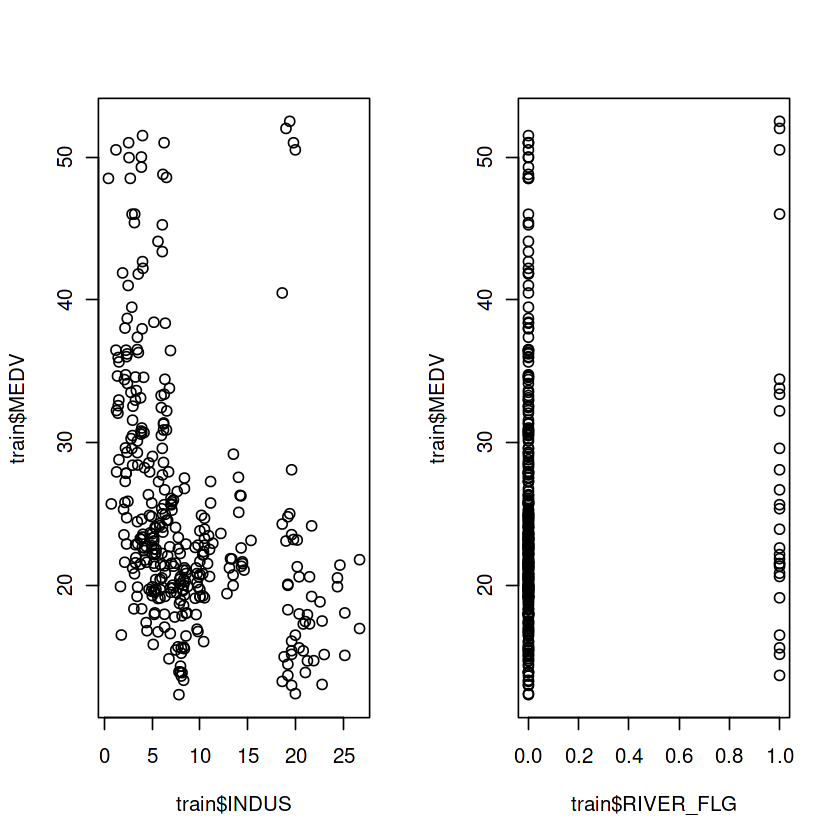

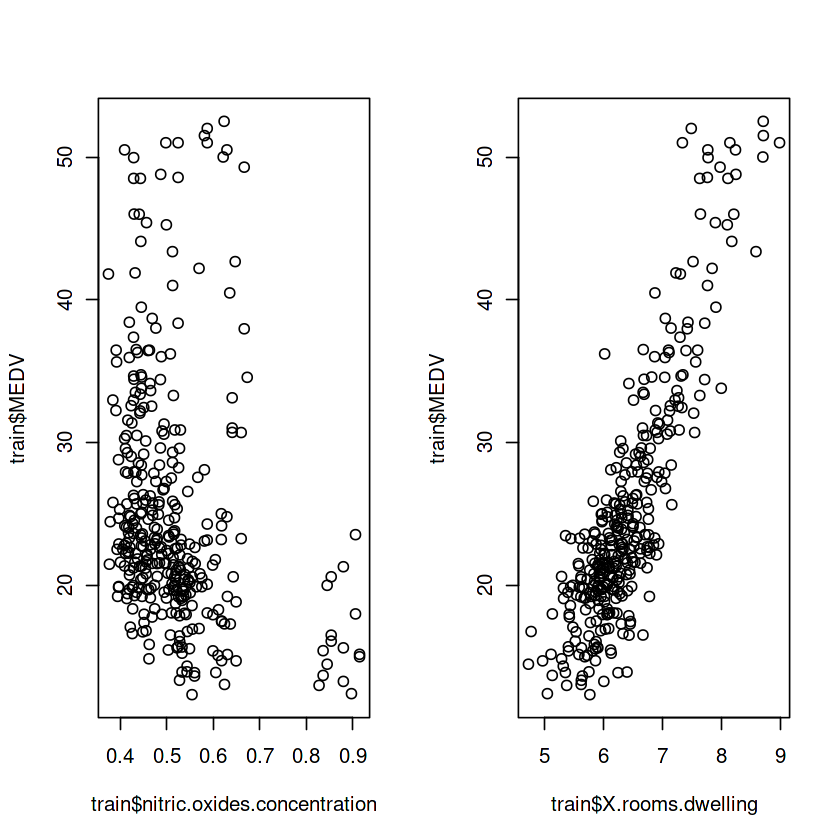

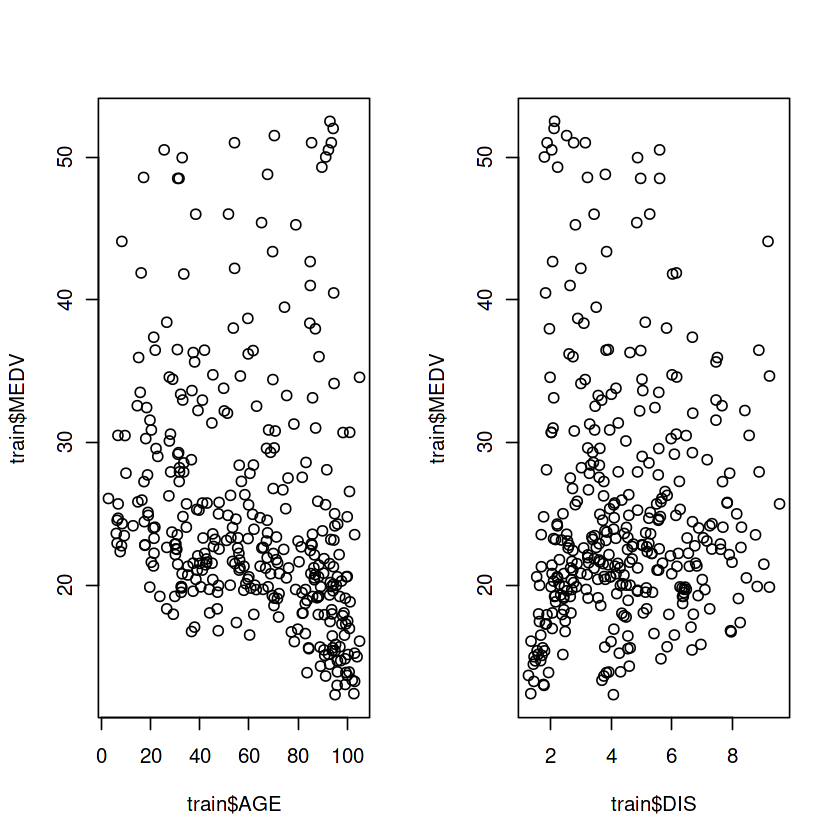

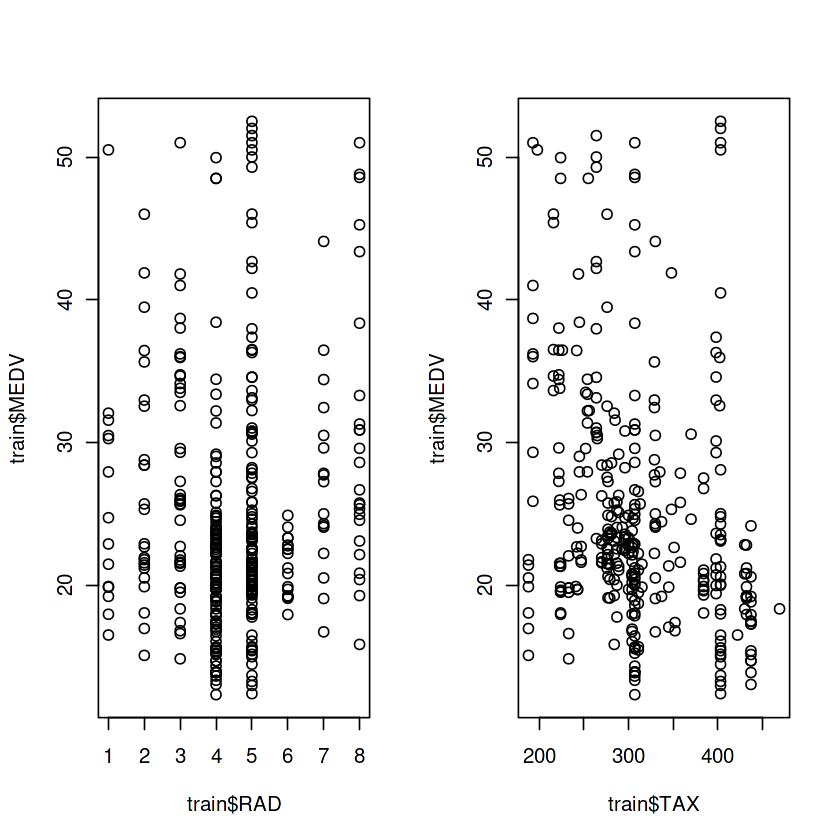

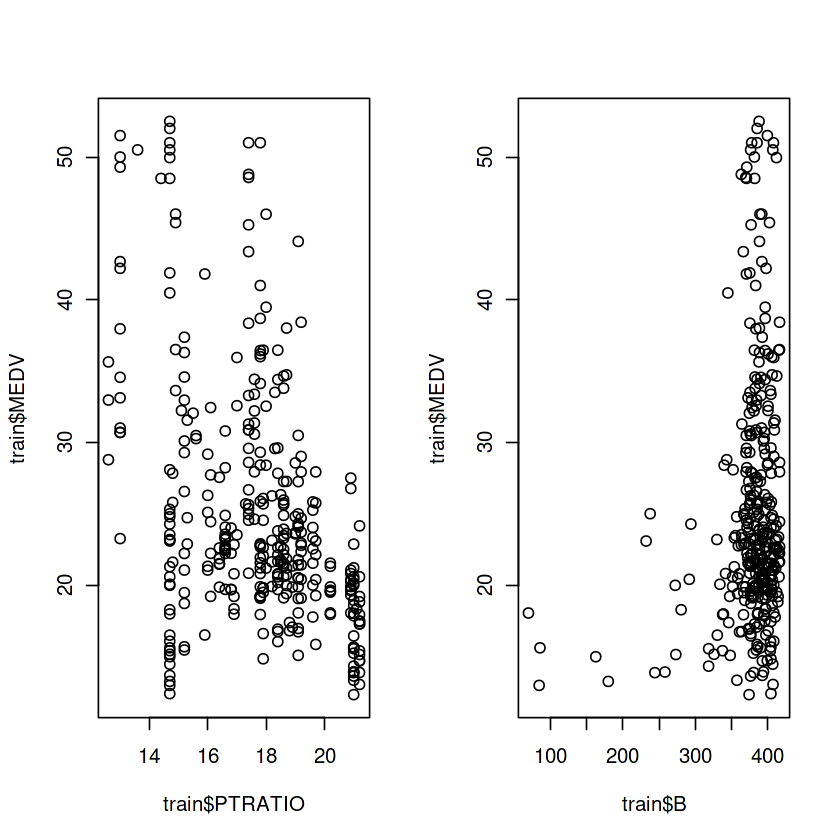

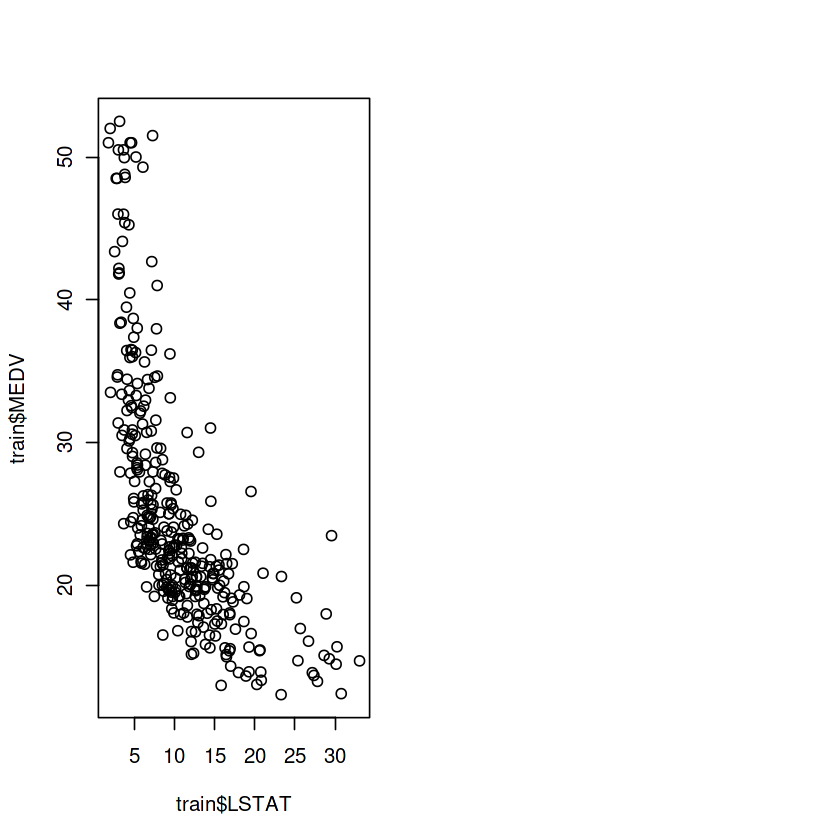

In [7]:
par(mfrow = c(1,2))
plot(train$CRIM,train$MEDV)
plot(train$ZN,train$MEDV)
plot(train$INDUS,train$MEDV)
plot(train$RIVER_FLG,train$MEDV)
plot(train$nitric.oxides.concentration,train$MEDV)
plot(train$X.rooms.dwelling,train$MEDV)
plot(train$AGE,train$MEDV)
plot(train$DIS,train$MEDV)
plot(train$RAD,train$MEDV)
plot(train$TAX,train$MEDV)  
plot(train$PTRATIO,train$MEDV)
plot(train$B,train$MEDV)
plot(train$LSTAT,train$MEDV)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3743  0.4415  0.4894  0.5107  0.5429  0.9145 

10%       15%       20%       25%       30%       35%       40%       45% 
0.4169450 0.4254440 0.4302960 0.4415275 0.4459150 0.4552810 0.4648670 0.4779850 
      50%       55%       60%       65%       70%       75%       80%       85% 
0.4894250 0.5039835 0.5144480 0.5221575 0.5295880 0.5429175 0.5595200 0.5868500 
      90%       95%      100% 
0.6240000 0.6664100 0.9145500

[1] 0.292185

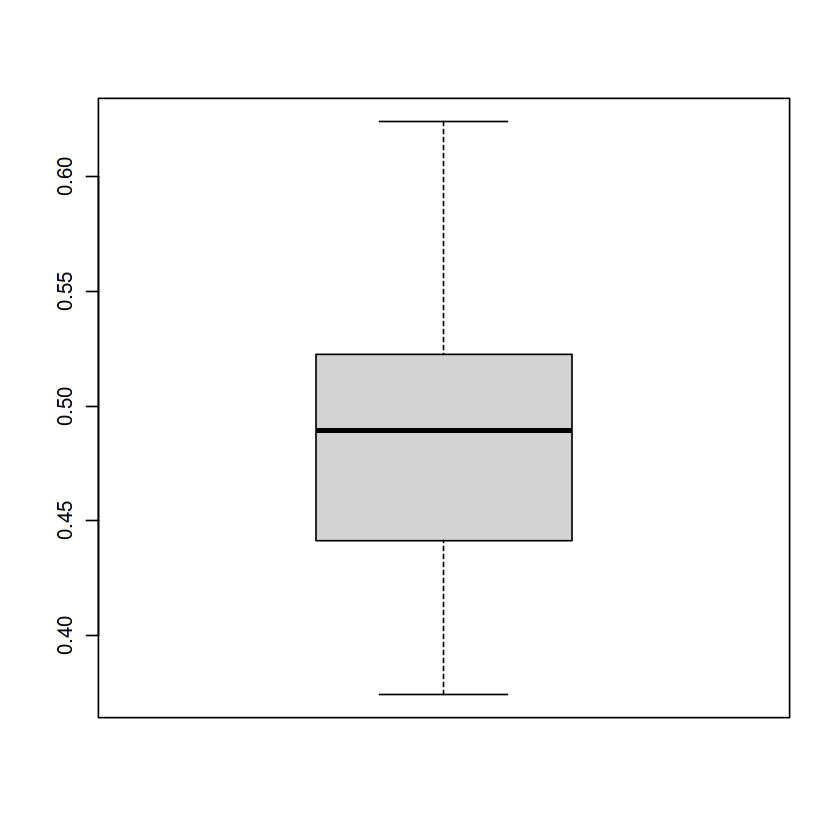

In [8]:
#Outliers treatment
summary(train$nitric.oxides.concentration)
quantile(train$nitric.oxides.concentration, probs = seq(.1, 1, by = .05))
train$nitric.oxides.concentration <- ifelse(train$nitric.oxides.concentration > 0.624,0.5107,train$nitric.oxides.concentration) #replacing by mean
library(moments)
skewness(train$nitric.oxides.concentration)
boxplot(train$nitric.oxides.concentration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.729   5.932   6.276   6.397   6.747   8.987 

10%      15%      20%      25%      30%      35%      40%      45% 
5.620112 5.758010 5.858120 5.931550 5.980394 6.061410 6.123768 6.211142 
     50%      55%      60%      65%      70%      75%      80%      85% 
6.276270 6.331485 6.430726 6.515871 6.635319 6.746752 6.901856 7.118682 
     90%      95%     100% 
7.353165 7.772647 8.986750

[1] 0.3361876

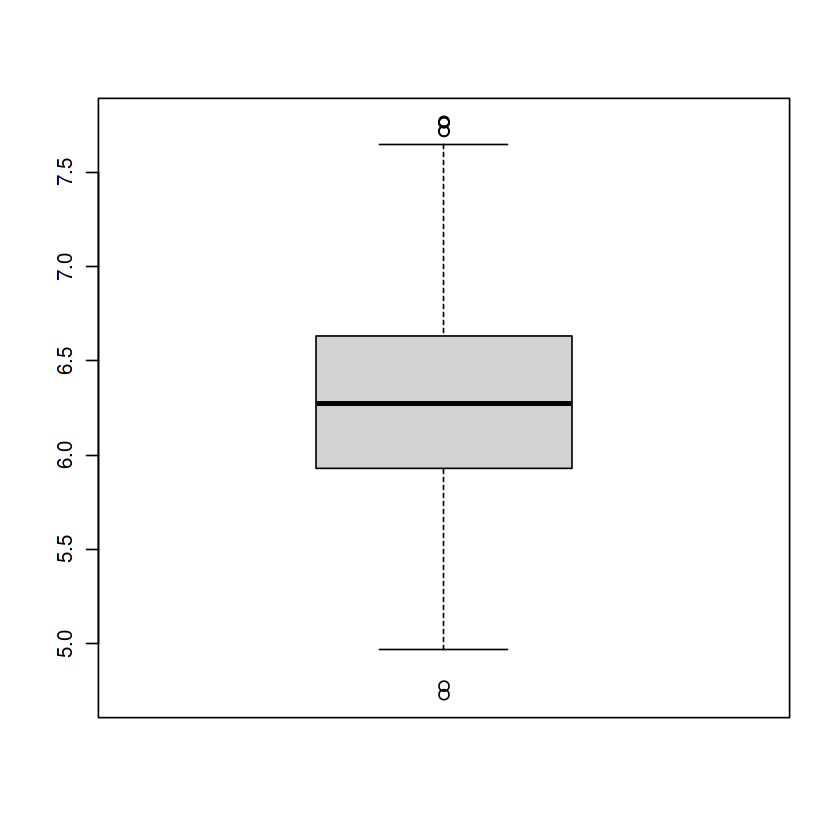

In [9]:
summary(train$X.rooms.dwelling)
quantile(train$X.rooms.dwelling, probs = seq(.1, 1, by = .05))
train$X.rooms.dwelling <- ifelse(train$X.rooms.dwelling> 7.7726475,6.276,train$X.rooms.dwelling ) # replaced by median 6.276
skewness(train$X.rooms.dwelling)
boxplot(train$X.rooms.dwelling)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.871  35.150  62.020  60.867  88.151 105.000 

10%       15%       20%       25%       30%       35%       40%       45% 
 21.02300  28.12765  31.63940  35.14950  40.29600  45.38070  52.61460  56.98780 
      50%       55%       60%       65%       70%       75%       80%       85% 
 62.01950  67.79680  71.83820  79.97400  84.94850  88.15100  91.20900  94.04785 
      90%       95%      100% 
 96.01000  99.84430 105.00000

[1] 0.3361876

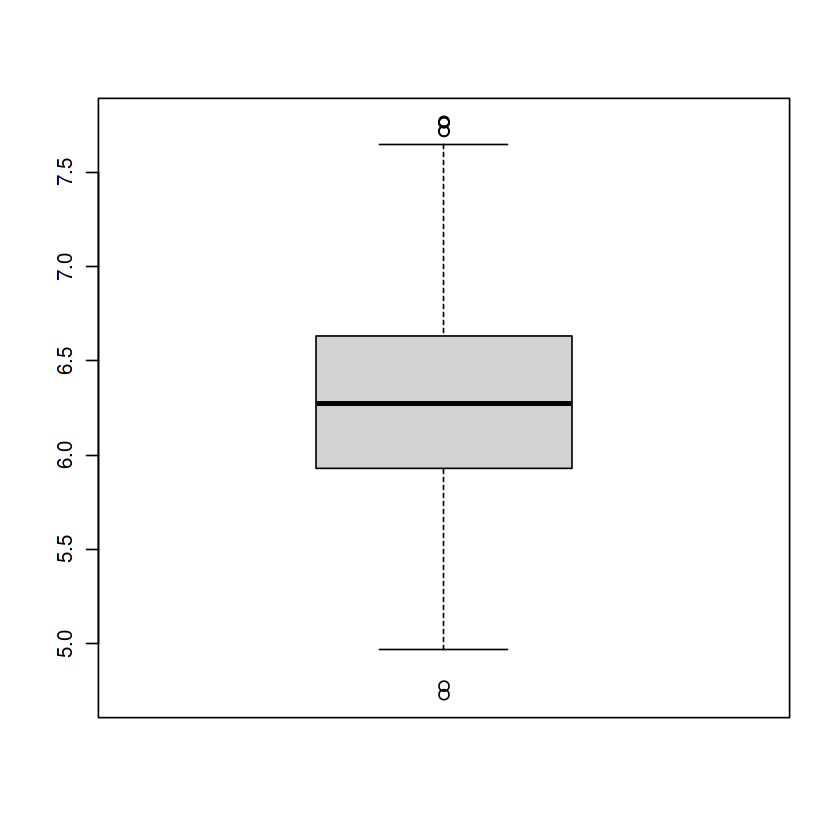

In [10]:
summary(train$AGE)
quantile(train$AGE, probs = seq(.1, 1, by = .05))
skewness(train$X.rooms.dwelling)
boxplot(train$X.rooms.dwelling)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.256   2.723   4.108   4.402   5.751   9.555 

10%      15%      20%      25%      30%      35%      40%      45% 
2.015862 2.203615 2.469722 2.723105 3.117256 3.406331 3.615381 3.838845 
     50%      55%      60%      65%      70%      75%      80%      85% 
4.108295 4.421109 4.683147 5.050125 5.414486 5.750662 6.216316 6.670638 
     90%      95%     100% 
7.255609 7.971101 9.555104

[1] 0.4833749

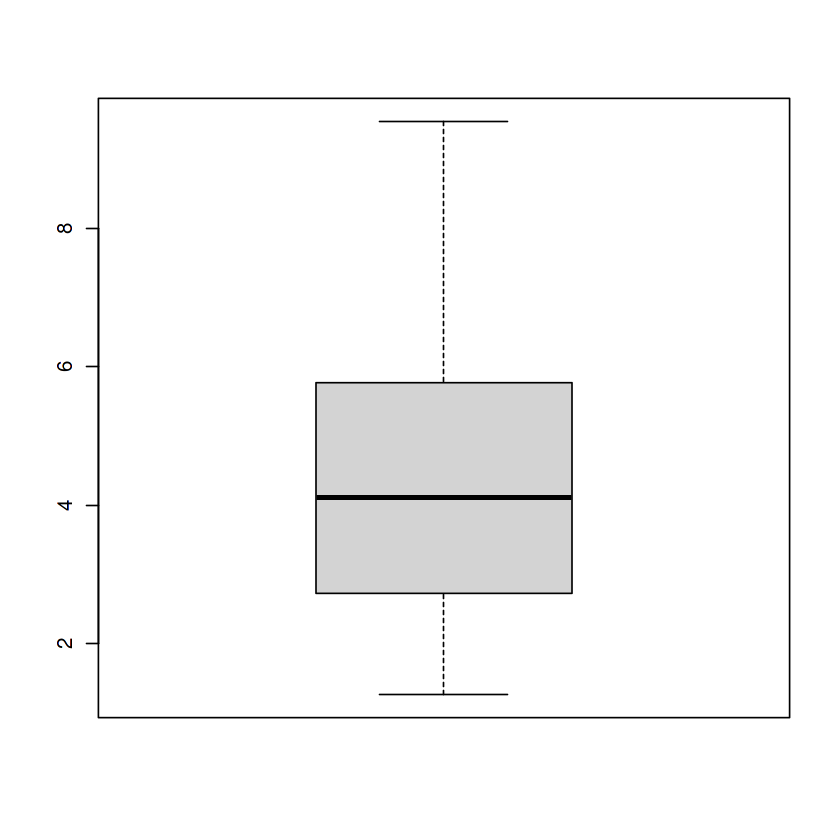

In [11]:
summary(train$DIS)
quantile(train$DIS, probs = seq(.1, 1, by = .05))
skewness(train$DIS)
boxplot(train$DIS)

In [12]:
skewness(train$DIS)
skewness(train$TAX)
skewness(train$PTRATIO)
skewness(train$B)
skewness(train$LSTAT)
skewness(train$RAD)

[1] 0.4833749

[1] 0.3417155

[1] -0.2773427

[1] -4.420306

[1] 1.281004

[1] 0.2072895

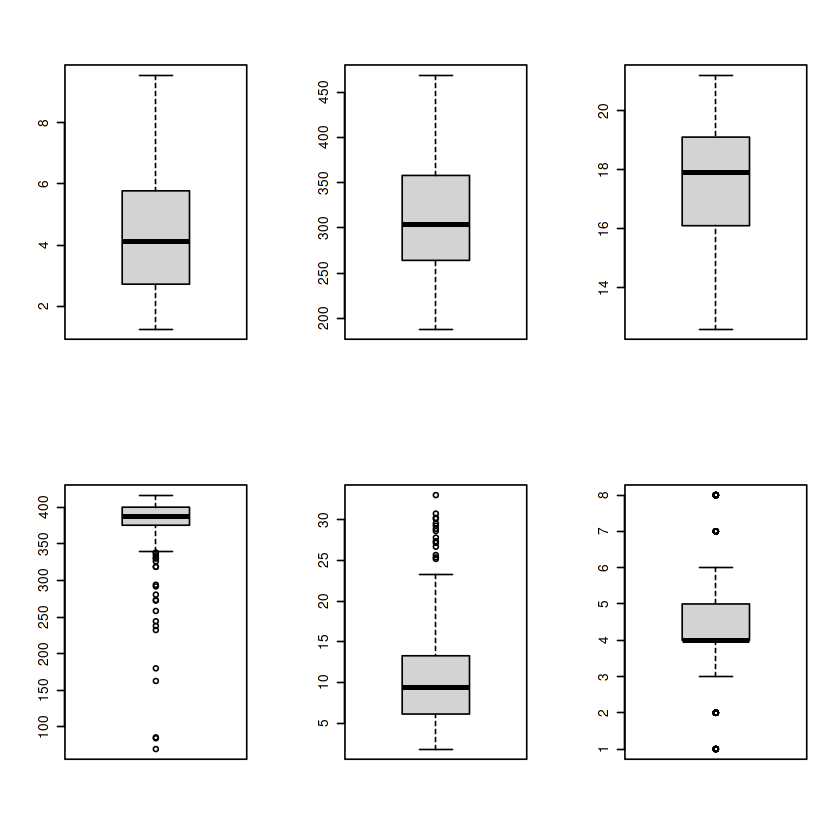

In [13]:
par(mfrow = c(2,3))
boxplot(train$DIS)
boxplot(train$TAX)
boxplot(train$PTRATIO)
boxplot(train$B)
boxplot(train$LSTAT)
boxplot(train$RAD)

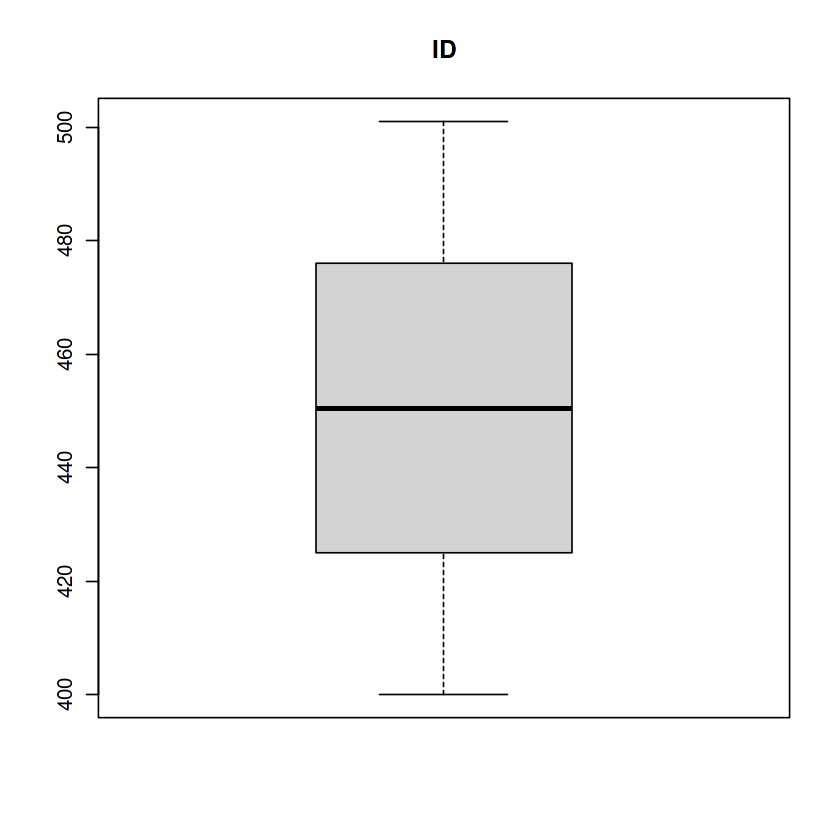

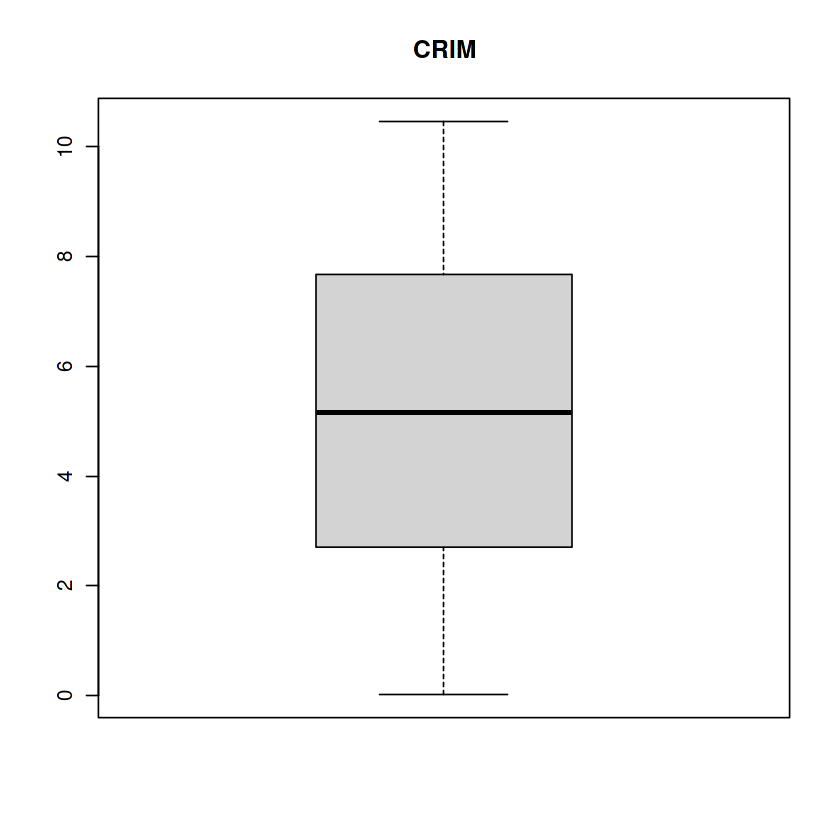

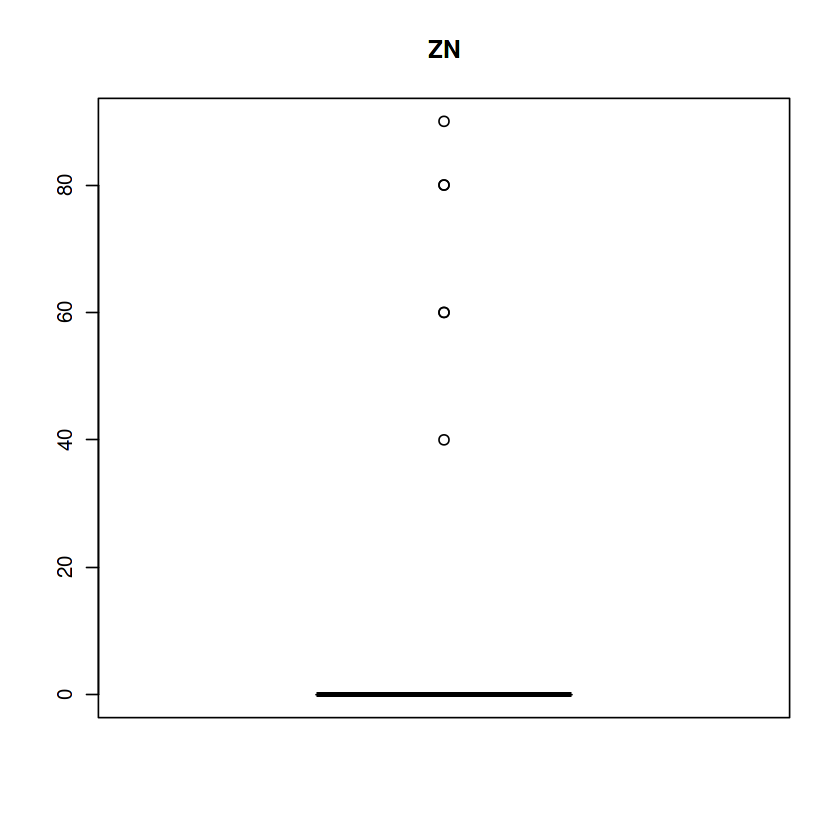

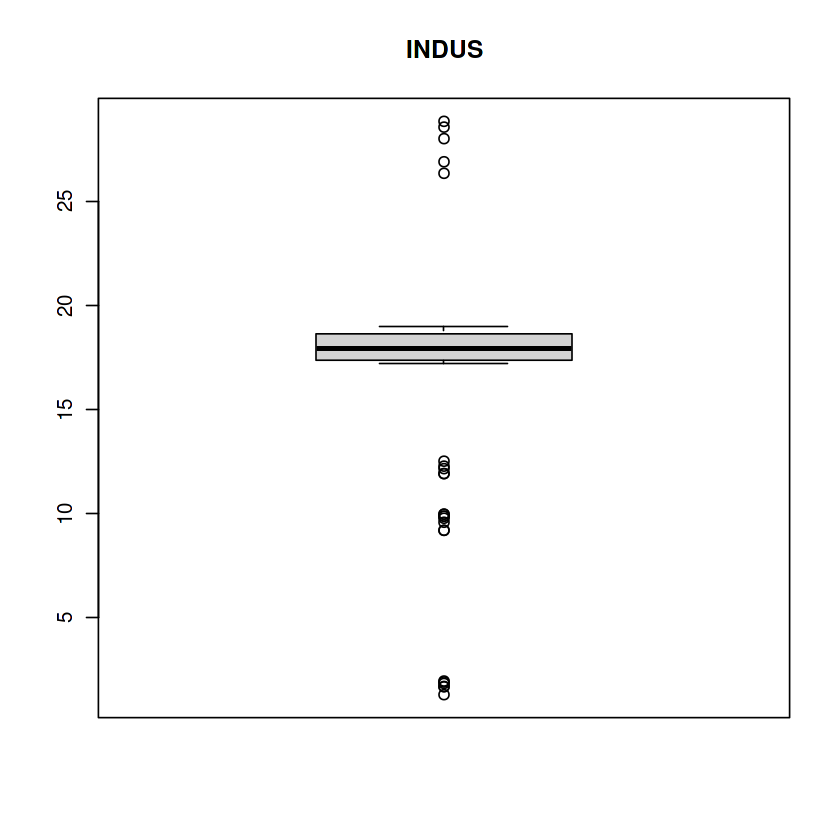

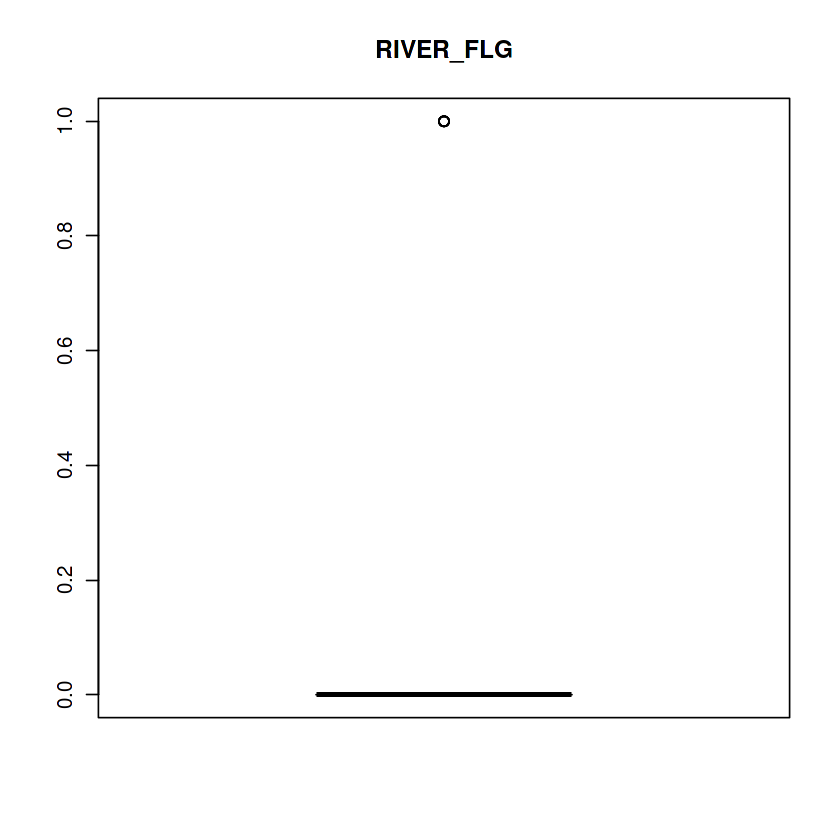

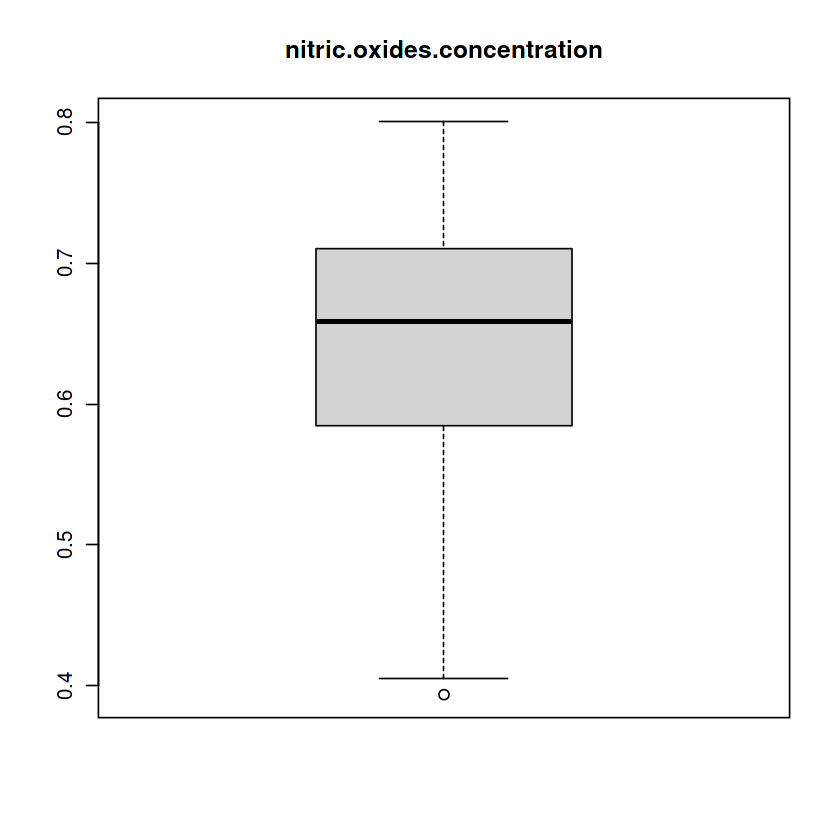

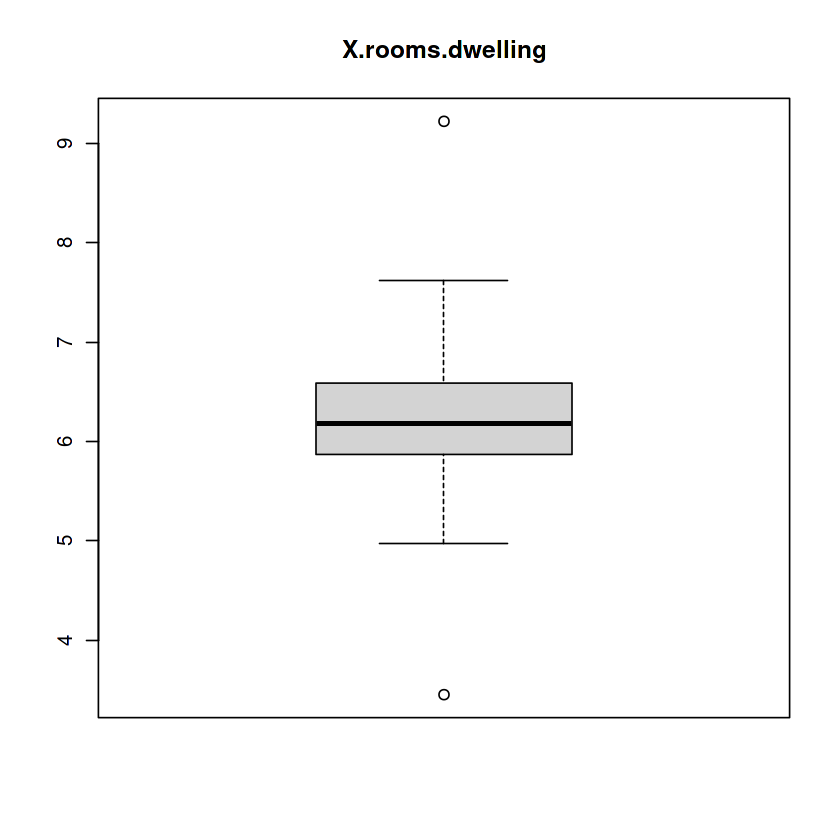

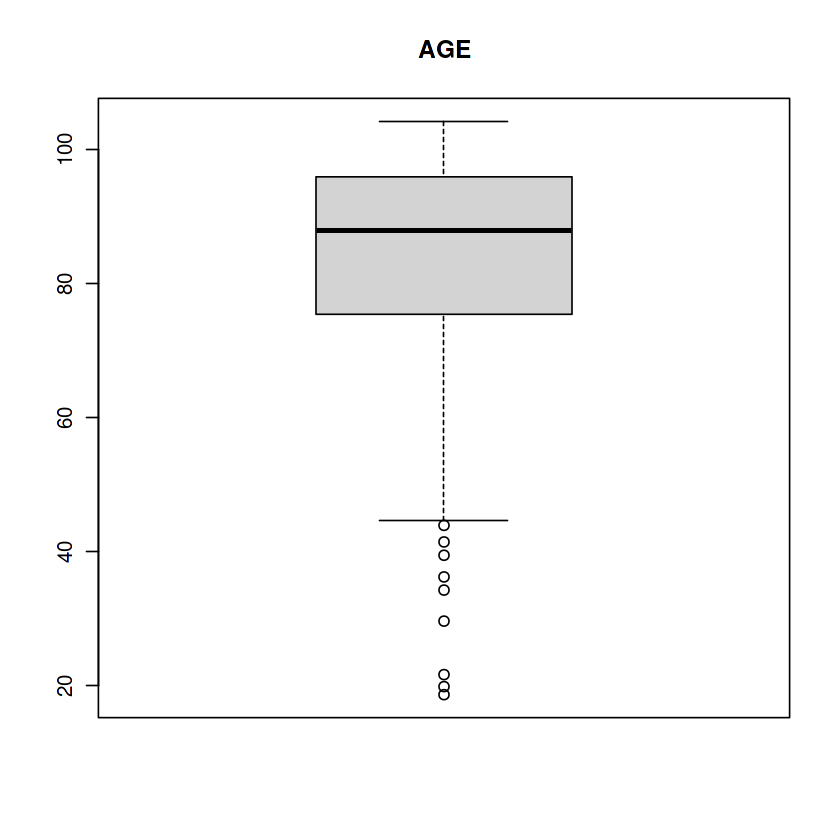

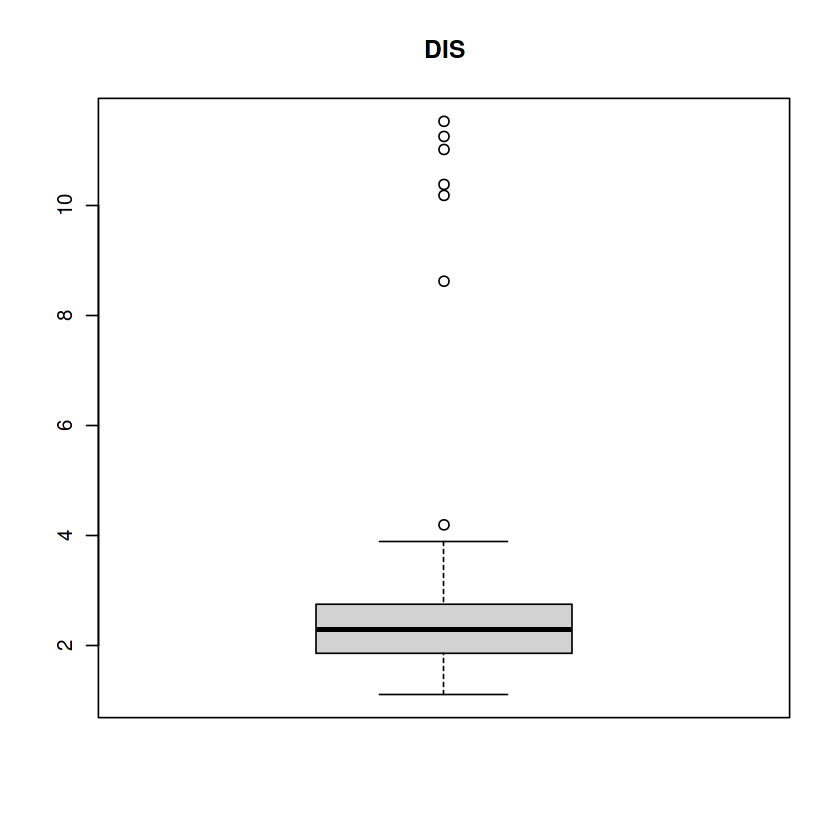

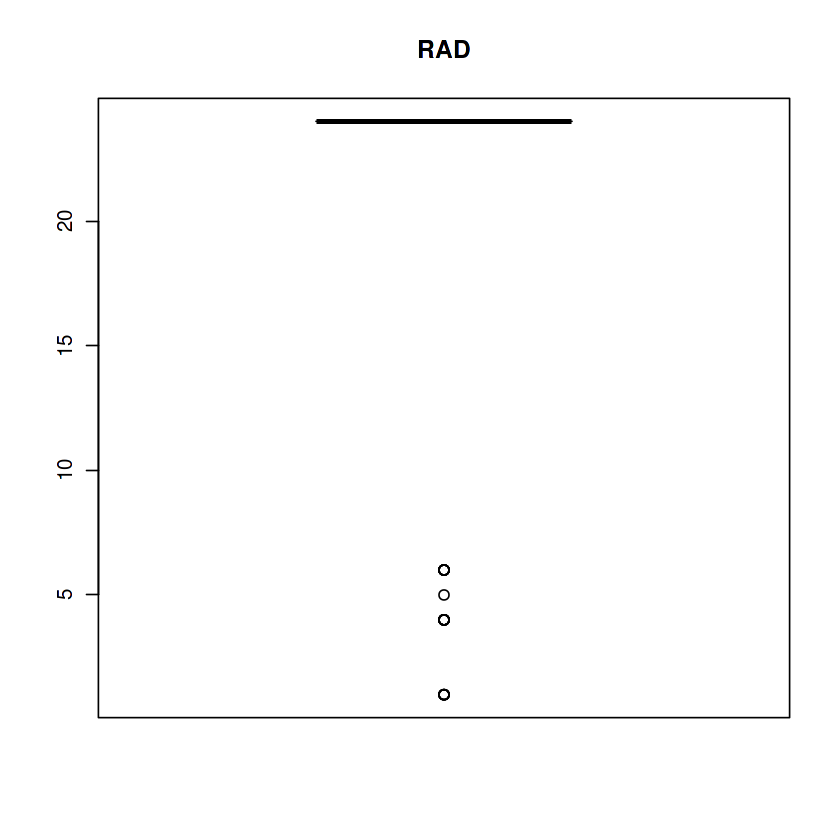

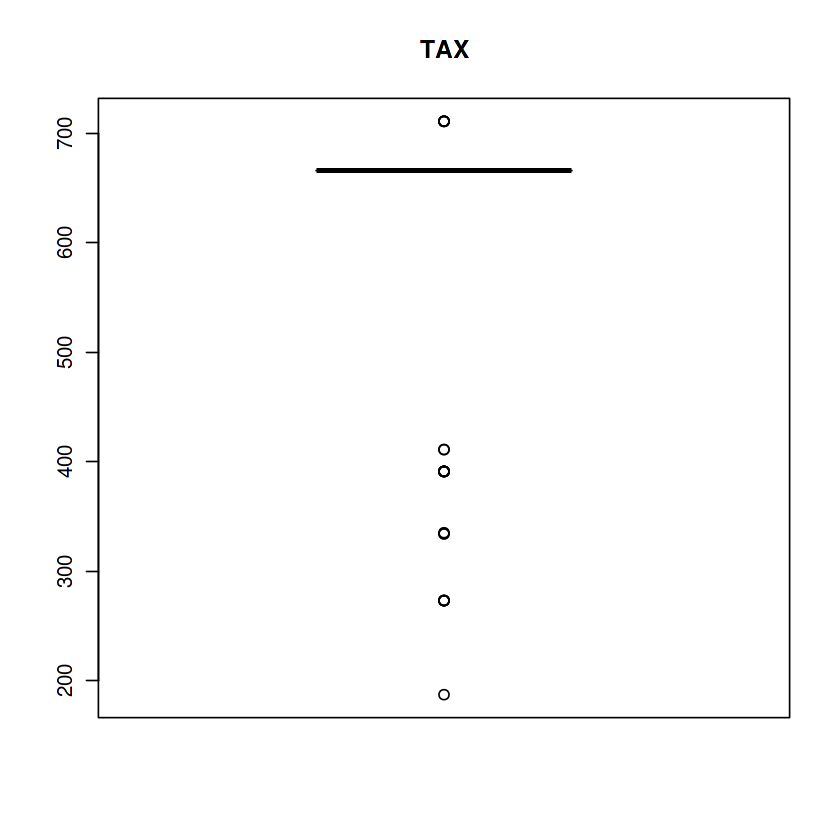

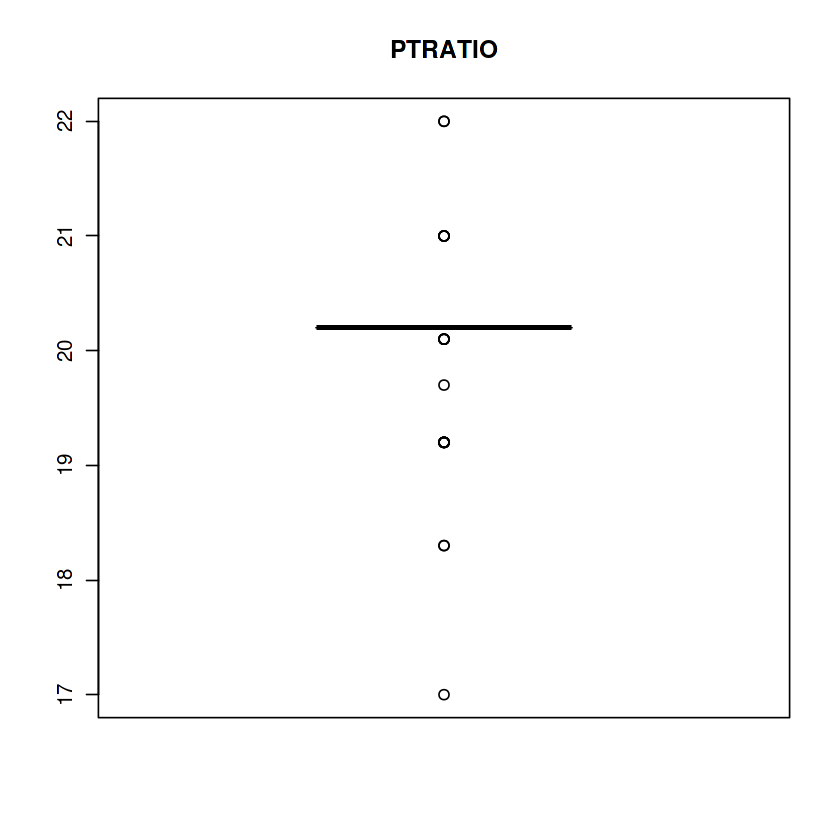

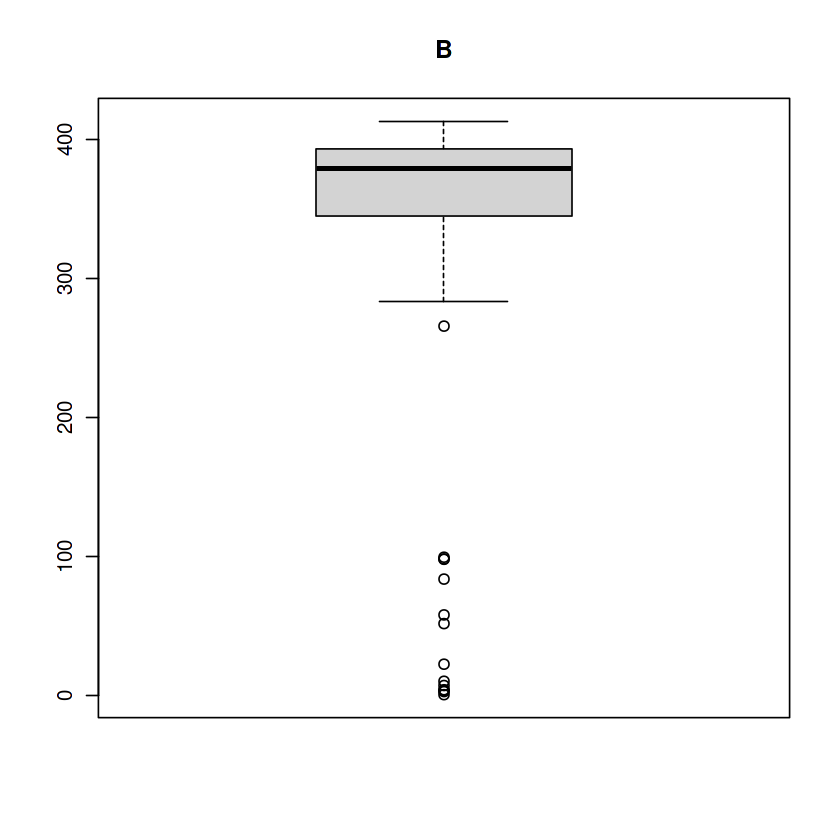

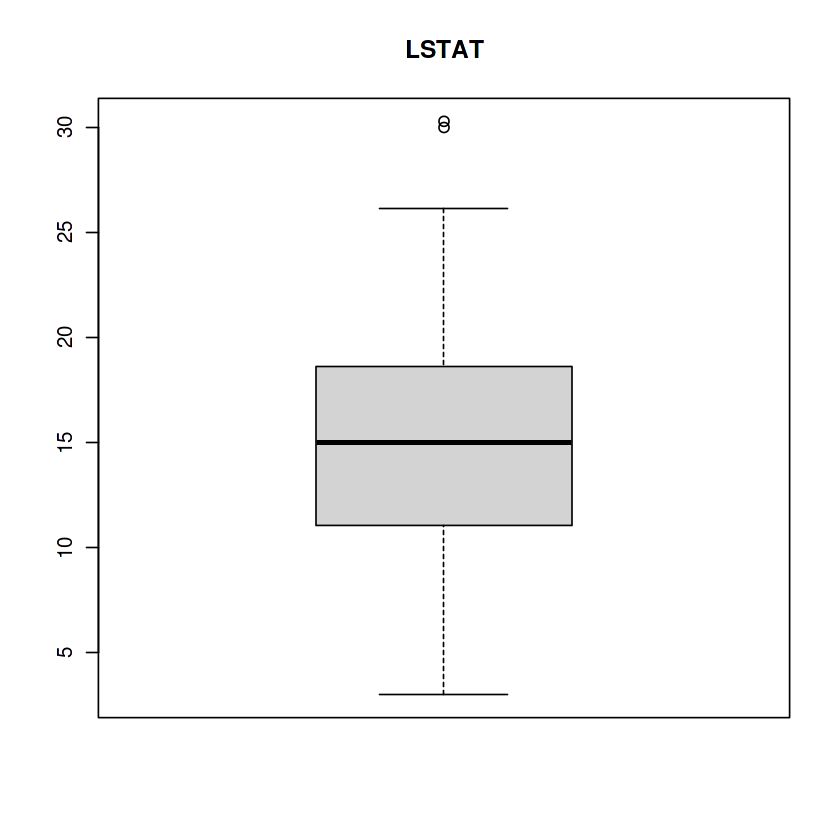

In [14]:
list<-names(test) 
for(i in 1:length(list))
{
  #Plot the boxplots of variables and shortlist which require outlier treatment
  boxplot(test[,list[i]],main=list[i])  
}

In [15]:
mod3<-lm(log(MEDV)~log(LSTAT)+X.rooms.dwelling+log(DIS)+nitric.oxides.concentration
   +log(RAD)+log(TAX)+PTRATIO+I(LSTAT^2)+I(X.rooms.dwelling^2),data=train)

In [16]:
summary(mod3)


Call:
lm(formula = log(MEDV) ~ log(LSTAT) + X.rooms.dwelling + log(DIS) + 
    nitric.oxides.concentration + log(RAD) + log(TAX) + PTRATIO + 
    I(LSTAT^2) + I(X.rooms.dwelling^2), data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38934 -0.08608 -0.00676  0.08386  0.48534 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  5.644e+00  8.187e-01   6.894 2.65e-11 ***
log(LSTAT)                  -3.714e-01  2.761e-02 -13.453  < 2e-16 ***
X.rooms.dwelling             1.637e-02  2.470e-01   0.066 0.947205    
log(DIS)                    -9.040e-02  2.559e-02  -3.532 0.000469 ***
nitric.oxides.concentration  5.386e-02  2.122e-01   0.254 0.799848    
log(RAD)                     5.320e-02  1.887e-02   2.819 0.005096 ** 
log(TAX)                    -2.802e-01  3.877e-02  -7.228 3.25e-12 ***
PTRATIO                     -2.701e-02  3.968e-03  -6.806 4.55e-11 ***
I(LSTAT^2)                   1.018e-04  8.319

In [17]:
vif(mod3)

log(LSTAT)            X.rooms.dwelling 
                   3.953554                  326.472279 
                   log(DIS) nitric.oxides.concentration 
                   2.462982                    2.383648 
                   log(RAD)                    log(TAX) 
                   1.113155                    1.182934 
                    PTRATIO                  I(LSTAT^2) 
                   1.245885                    3.504392 
      I(X.rooms.dwelling^2) 
                 320.749162

In [18]:
AIC(mod3)

[1] -341.6669

In [19]:
#Predicted vs Actual
actual<-train$MEDV
predicted<-predict(mod3,train)

In [20]:
length(predicted)

[1] 350

In [21]:
predicted_ex<-exp(predicted)

In [22]:
train_AP <-data.frame(predicted_ex,actual)
train_AP

,predicted_ex,actual
,<dbl>,<dbl>
1,29.35725,24.720
2,24.49035,22.680
3,36.28292,36.435
4,40.75750,34.736
5,31.89557,38.010
6,29.14615,27.265
7,21.70786,22.213
8,18.98767,26.558
9,15.39232,15.675


In [23]:
#RMSE
train_AP1<-actual-predicted_ex

In [24]:
#train_AP1
rmse_cal<-sqrt(mean(train_AP1^2))
rmse_cal

[1] 4.197587

In [25]:
MEDV1<-predict(mod3,test)

In [26]:
head(MEDV1)

1        2        3        4        5        6 
3.014028 3.320314 3.572819 3.064714 3.492047 2.956142

In [27]:
MEDV2<-exp(MEDV1)

In [28]:
test$MEDV<-MEDV2

In [29]:
head(test)

,ID,CRIM,ZN,INDUS,RIVER_FLG,nitric.oxides.concentration,X.rooms.dwelling,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,400,9.693915,0,18.824,0,0.63731,6.02952,100.000,1.204173,24,666,20.2,347.8425,10.0065,20.36929
2,401,5.143131,0,18.462,0,0.63731,4.97000,100.000,1.305850,24,666,20.2,356.7440,3.0970,27.66903
3,402,6.407985,0,17.557,1,0.63100,7.01600,93.600,1.178352,24,666,20.2,380.2885,3.0192,35.61685
4,403,8.267250,0,18.462,1,0.67468,6.16875,93.184,1.107008,24,666,20.2,354.8376,9.3240,21.42833
5,404,5.726680,0,17.919,1,0.66255,6.95032,96.800,1.329566,24,666,20.2,364.0701,3.5808,32.85314
6,405,4.553952,0,17.919,0,0.63856,6.63100,69.628,2.431584,24,666,20.2,363.4396,12.1264,19.22366


In [30]:
final<-test[,c("ID","MEDV")] 

In [31]:
head(final)

,ID,MEDV
,<int>,<dbl>
1,400,20.36929
2,401,27.66903
3,402,35.61685
4,403,21.42833
5,404,32.85314
6,405,19.22366


In [32]:
write.table(final,file="IndoreHP_Sample",sep=",")

## Submission

In [33]:
submit <- read.csv("./IndoreHP_Sample")

write.csv(submit, "submission.csv", row.names = FALSE)